In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Read Dataset

In [25]:
df_airlines = pd.read_csv('airlines.csv', index_col=0)
df_airports = pd.read_csv('airports.csv', index_col=0)

In [26]:
df = pd.read_csv('flights.csv')
df

C:\Users\Yousef Nasr\AppData\Local\Temp\ipykernel_9816\1892132176.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [28]:
airlines_map = dict(zip(df_airlines.index, df_airlines['AIRLINE']))
airports_map = dict(zip(df_airports.index, df_airports['AIRPORT']))
airports_city_map = dict(zip(df_airports.index, df_airports['CITY']))
airports_state_map = dict(zip(df_airports.index, df_airports['STATE']))

In [29]:
# df['ORIGIN_CITY'] = df['ORIGIN_AIRPORT'].map(airports_city_map)
# df['STATE'] = df['ORIGIN_AIRPORT'].map(airports_state_map)

In [30]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# this function for show the nan values in columns because data is huge
def info_n(df):
    for i in df.columns:
        val = df[i].isna().sum()
        print(f'{i}: {val} : {round((val/len(df))*100, 2)}% ')    

In [32]:
info_n(df)

YEAR: 0 : 0.0% 
MONTH: 0 : 0.0% 
DAY: 0 : 0.0% 
DAY_OF_WEEK: 0 : 0.0% 
AIRLINE: 0 : 0.0% 
FLIGHT_NUMBER: 0 : 0.0% 
TAIL_NUMBER: 14721 : 0.25% 
ORIGIN_AIRPORT: 0 : 0.0% 
DESTINATION_AIRPORT: 0 : 0.0% 
SCHEDULED_DEPARTURE: 0 : 0.0% 
DEPARTURE_TIME: 86153 : 1.48% 
DEPARTURE_DELAY: 86153 : 1.48% 
TAXI_OUT: 89047 : 1.53% 
WHEELS_OFF: 89047 : 1.53% 
SCHEDULED_TIME: 6 : 0.0% 
ELAPSED_TIME: 105071 : 1.81% 
AIR_TIME: 105071 : 1.81% 
DISTANCE: 0 : 0.0% 
WHEELS_ON: 92513 : 1.59% 
TAXI_IN: 92513 : 1.59% 
SCHEDULED_ARRIVAL: 0 : 0.0% 
ARRIVAL_TIME: 92513 : 1.59% 
ARRIVAL_DELAY: 105071 : 1.81% 
DIVERTED: 0 : 0.0% 
CANCELLED: 0 : 0.0% 
CANCELLATION_REASON: 5729195 : 98.46% 
AIR_SYSTEM_DELAY: 4755640 : 81.72% 
SECURITY_DELAY: 4755640 : 81.72% 
AIRLINE_DELAY: 4755640 : 81.72% 
LATE_AIRCRAFT_DELAY: 4755640 : 81.72% 
WEATHER_DELAY: 4755640 : 81.72% 


#### Data Analysis


> The months with the most frequent flights ?

c:\Users\Yousef Nasr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MONTH', ylabel='count'>

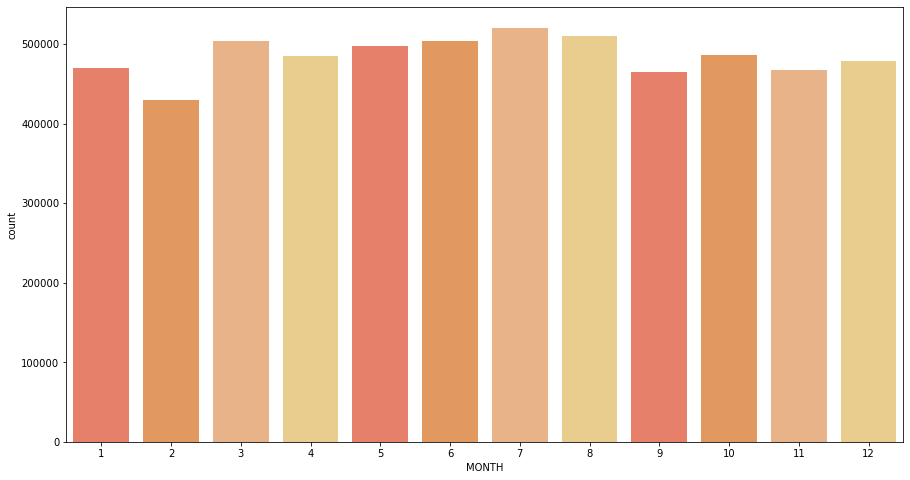

In [33]:
fig = plt.figure(figsize=[15,8])
sns.countplot(df['MONTH'], palette=['#FA7256', '#F89649', '#F8B179', '#F7D380'])

> Q1\ The months with the most frequent cancelled flights ?

c:\Users\Yousef Nasr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MONTH', ylabel='count'>

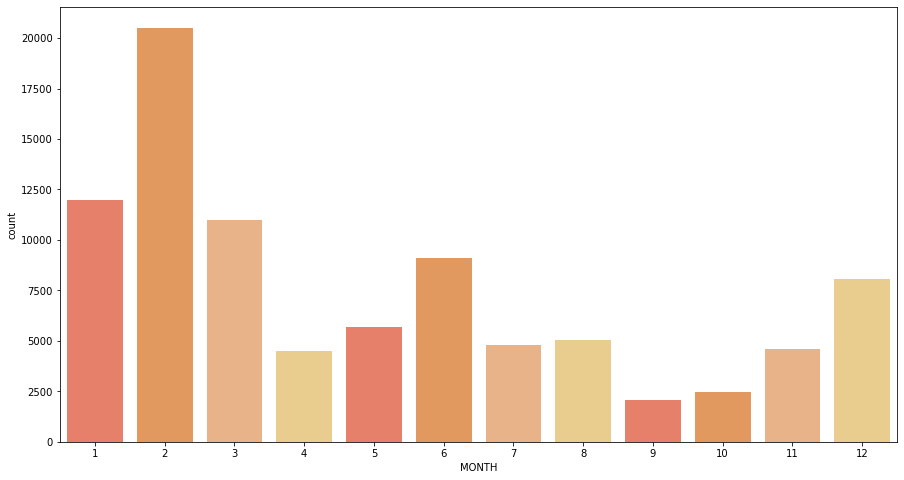

In [34]:
fig = plt.figure(figsize=[15,8])
df_ex = df[df['CANCELLED'] == 1]
sns.countplot(df_ex['MONTH'], palette=['#FA7256', '#F89649', '#F8B179', '#F7D380'])

> Q2\ The main reasons for canceling flights ?

In [49]:
df_ex = df['CANCELLATION_REASON'].value_counts()
df_ex

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

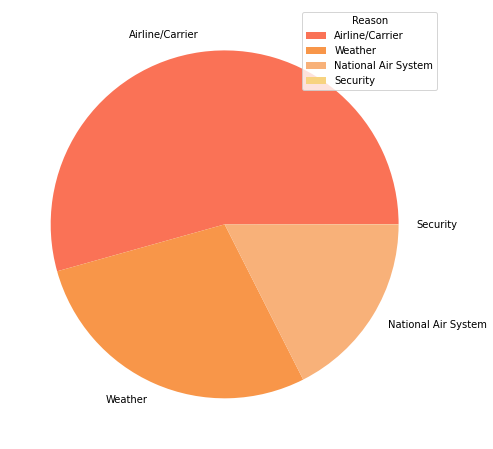

In [51]:
fig = plt.figure(figsize=[15,8])
df_ex = df['CANCELLATION_REASON'].value_counts()

plt.pie(df_ex, colors=['#FA7256', '#F89649', '#F8B179', '#F7D380'], labels=['Airline/Carrier', 'Weather', 'National Air System', 'Security'])
plt.legend(title='Reason')
plt.show() 